In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [9]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [10]:
torch.cuda.set_device(0)

In [11]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-bengali/language-model')

In [12]:
p = path.glob('BengaliWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [13]:
len(files)

72374

In [14]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [15]:
len(train_files), len(test_files)

(50661, 21713)

In [16]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-bengali/language-model/BengaliWikipediaArticles/30720.pkl')

In [17]:
str(train_files[0]).split('/')[-1][:-4]

'30720'

In [18]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'BengaliDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [19]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'BengaliDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [20]:
class BengaliTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/bengali_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [21]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/bengali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [22]:
# 30,000 is the vocab size that we chose in sentencepiece
bengali_vocab = Vocab(itos)

In [23]:
tokenizer = Tokenizer(tok_func=BengaliTokenizer, lang='bn')

In [24]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [25]:
data_lm = TextLMDataBunch.from_folder(path=path/'BengaliDataset', tokenizer=tokenizer, vocab=bengali_vocab)

In [26]:
data_lm.batch_size

64

In [28]:
data_lm.save()

In [29]:
data_lm.show_batch()

idx,text
0,"▁x x bo s ▁ফিলো লাউ স ▁৩৮ ৫ ▁একজন ▁গ্রিক ▁দার্শনিক ▁এবং ▁একজন ▁পি থা গো রিয়ান . ▁প্রাক ▁- স ক্রেট িয় ▁দার্শনিক । ▁) ▁l ▁তাঁর ▁দর্শন ▁অনুসারে ▁সব ▁বস্তু ই ▁সীমিত ▁ও ▁অসীম ▁উপাদান ে ▁নির্মিত , ▁আর ▁মহাবিশ্ব ▁সংখ্যা ▁দ্বারা ▁নির্ধারিত ▁হয় । ▁পৃথিবী ▁যে ▁মহাবিশ্বের ▁কেন্দ্রস্থল ▁নয় , ▁এই ▁ধারণা ▁তিনিই ▁প্রথম ▁প্রবর্তন ▁করেন ▁বলে ▁মনে ▁করা ▁হয় । ▁তিনি ▁আরো ▁বিশ্বাস ▁করতেন ▁যে"
1,"এফ ডিসি তে । ▁ছবির ▁ডাবিং , ▁সম্পাদনা ▁ও ▁মুদ্রণ ▁হয় ▁মিরপুর ের ▁একটি ▁ব্যক্তি মালিক ানা ▁স্টুডিওতে । ▁নয়ন ের ▁আলো ▁চলচ্চিত্রের ▁গীত ▁রচনা ▁ও ▁সঙ্গীত ▁পরিচালনা ▁করেছেন ▁আহমেদ ▁ ইমতিয়াজ ▁বুলবুল । ▁এই ▁চলচ্চিত্র ▁দিয়ে ▁সঙ্গীত ▁পরিচালনা ▁শুরু ▁করেন ▁আহমেদ ▁ ইমতিয়াজ ▁বুলবুল । ▁১৯৯৮ ▁সালে ▁একই ▁নামে ▁টলিউড ে ▁আরেকটি ▁চলচ্চিত্র ▁নির্মাণ ▁করা ▁হয় , ▁তাতে ▁"" আমার ▁সারা দেহ ▁খে য়ো গো ▁মাটি "", ▁"" আমার"
2,▁৮ ▁জুন ▁২০১৪ ▁তারিখে ▁ব্রাজিলে ▁আসে । ▁ম্যাচ সেরা : মারি ও ▁গো ট জে ▁সহকারী ▁রেফারি গণ : রেন াতো ▁ফা ভেরা নি ▁আন্দ্রে য়া ▁ স্তে ফা নি ▁চতুর্থ ▁অফিসিয়াল : কার্ল োস ▁বের া ▁পঞ্চম ▁অফিসিয়াল : ক্রি স্ত িয়ান ▁লে স্কা নো ▁x x bo s ▁ডেনিস ▁ব্রুকস ▁লিডস ের ▁কিপাক্স ে ▁জন্মগ্রহণকারী ▁বিশিষ্ট ▁ইংরেজ ▁আন্তর্জাতিক ▁ক্রিকেটার ▁ছিলেন । ▁ইংল্যান্ড ▁ক্রিকেট ▁দলের ▁পক্ষে ▁একটিমাত্র ▁টেস্টে ▁অংশগ্রহণের
3,"▁এদের ▁গায়ে র ▁রঙ ▁হয় ▁সাদা ▁রঙের ▁এবং ▁এদের ▁পাখনা র ▁রঙ ▁হয় ▁কালো ▁এবং ▁এদের ▁ঠোঁট ▁গোলাপী ▁রঙের ▁হয় । ▁এদের ▁ঠোঁট কে ▁পাখিদের ▁মধ্যে ▁সব থেকে ▁দীর্ঘ ▁ঠোঁট ▁বলে ▁মানা ▁হয় । ▁এদের ▁প্রধান ▁খাদ্য ▁হল ▁মাছ । ▁x x bo s ▁অ্যানড্রয়েড ▁৬ . ০ ▁"" মার্ শ ম্যা লো "" ▁অ্যানড্রয়েড ▁মোবাইল ▁অপারেটিং ▁সিস্টেমের ▁একটি ▁সংস্করণ । ▁এটির ▁প্রথম ▁পর্দা ▁উন্মোচ িত ▁হয় ▁২০১৫ সালের ▁মে"
4,"▁দুই ▁ভাইয়ের ▁মধ্যে ▁ইউ লির ▁গণিতে ▁ও ▁ইয়ে ভ্ ▁জেনি র ▁চিত্রাঙ্কন ে ▁আগ্রহ ▁ছিল , ▁তাদের ▁মায়ের ▁ভাষ্য ▁অনুযায়ী , ▁"" ভান িয়া ▁জন্মের ▁মুহূর্ত ▁থেকেই ▁ভিন্ন ▁ছিল ... ▁অন্য ▁কেউ ▁তার ▁মত ▁নয় ।"" ▁১৮৮৭ ▁সালের ▁মে ▁মাসে ▁বুন িনের ▁প্রথম ▁কবিতা ▁দি রি ভিন ্ ▁স্কি য়ে ▁নি শ্ ▁ চিয়ে ▁সেন্ট ▁পিটার্সবার্গ ের ▁সাহিত্য ▁সাময়িকী ▁ র দিন ায় ▁প্রকাশিত ▁হয় । ▁১৮৯১ ▁সালে ▁তাঁর ▁প্রথম"


In [30]:
len(data_lm.vocab.itos)

30000

In [31]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [32]:
gc.collect()

0

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


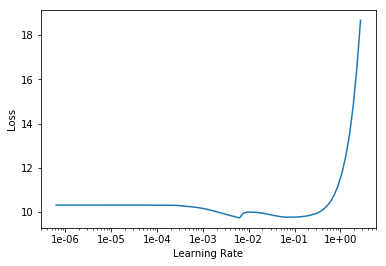

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.948041,4.842762,0.248783


In [36]:
learn.save('first', with_opt=True)

In [37]:
learn.load('first', with_opt=True);

In [38]:
learn.unfreeze()

In [39]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.827759,4.959311,0.236807
2,4.998166,4.927812,0.237777
3,4.654697,4.664890,0.260734
4,4.411924,4.356752,0.292806
5,4.221450,4.244792,0.308013


In [40]:
learn.save('second_bn_lm', with_opt=True)

In [41]:
learn.load('second_bn_lm', with_opt=True);

In [42]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.009347,4.237153,0.309086
2,4.068880,4.230307,0.310127
3,4.025786,4.222913,0.311233
4,4.084812,4.213515,0.312699
5,4.012681,4.202868,0.314369
6,4.017428,4.192035,0.316188
7,4.103319,4.177714,0.318278
8,3.976610,4.163298,0.320328
9,3.965150,4.146911,0.323207
10,3.977377,4.131856,0.324999


In [43]:
learn.save('third_bn_lm', with_opt=True)

In [50]:
learn.load('third_bn_lm', with_opt=True);

In [51]:
TEXT = "ফিলো লাউ"
N_WORDS = 40
N_SENTENCES = 2

In [52]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

ফিলো লাউ টস ▁ ▁ডেল ইন ▁ ে গা জ ও ▁বে ▁জি ▁ছ য়ো ▁স্টি ▁ফা টি ▁ক ▁রে । ▁পে ▁ডিও ▁ভি ▁কে ▁চিন , ▁সাল গে ▁তে ▁দিল ▁রা ▁লাগা ▁ । স ন্দ ▁ন ▁ সী ▁রয়েছে ▁
ফিলো লাউ সন জ বা দ্য ▁পাই ▁নামেও ▁পরিচিত ▁রুহুল ▁সনে ▁প্রটোকল ▁দ্বারা ▁পরিচিত ▁একটি ▁বাজিয়ে । ▁সাধারন ▁প্রতিক্রিয়ায় ▁গীত ▁হওয়ার ▁কথা ▁বলতে ▁কিছুটা ▁একটা ▁পরিবর্তন ▁বা ▁পরিবর্তন ▁ঘটায় ▁উপ স ার্ধ নির্দেশ ▁করা ▁যেতে ▁পারে , ▁এবং ▁ ▁সি ও ▁


In [53]:
np.exp(3.72)

41.2643941086108